# Iowa Ames House Price Project

# Load the dataset

In [1436]:
import pandas as pd
from IPython.core.display import display, HTML
import warnings

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')

In [1435]:
train = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test.csv', index_col=0)
train = train.reset_index()

##  Dataset summary:

1. 1460 oberservations, 79 valriables + 1 SalePrice

2. 20 continuous variables relate to various area dimensions for each observation. 

   'LotFrontage','LotArea','MasVnrArea','TotalBsmtSF', 'GrLivArea','PoolArea', 'MiscVal', 'PorchAgg',

3. 14 discrete variables typically quantify the number of items occurring within the house.
   'YearBuilt', 'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageCars', 'MoSold', 'YrSold'

4. 23 nominal categorical variables:
   'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope'
    ,'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',' Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Electrical', 'GarageType', 'SaleType']

5. 23 nominal categorical variables:
   'Condition1', 'OverallQual', 'OverallCond', 'ExterQual','ExterCond', 'BsmtQual', 'BsmtCond'
                , 'BsmtFinType1', 'HeatingQC','CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 
                'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'SaleCondition','Baths'


# Data cleaning rational:

1. Alley    93.77% 'NA' : remove
2. LotFrontage with 17.74% missing values:  replace with MEDIAN
3. MasVnrType:  5% missing value : replace with 'No' because MasVnrArea = 0

The following Basement 2.53% missing value is all because of no basement.
4. BsmtQual: 2.53% replace with 'No'.
5. BsmtCond: 2.53% replace with 'No'.
6. BsmtFinType1:  2.53% replace with 'No'.
7. BsmtExposure      2.60% replace with 'No'.

8. Electrical: 1 missing, impute with SBrkr	Standard Circuit Breakers & Romex
9. FireplaceQu: 47.26% missing value, replace with 'No' because of no pool.

The following garage feature with 5.55% missing value, replace with 'No'
10. GarageType 5.55 , 
11. GarageFinish 5.55, 
12. GarageQual  5.55, 
13. GarageCond  5.55,   
14. GarageYrBlt  5.55 ,  Fill with 0.

15. Fence: 80.75% missing value, replace with 'No'
16. MiscFeature 96.30% missing value, replace with 'No' because of MiscVal= 0
17. PoolQC      99.52% missing value, replace with 'No' because of PoolArea = 0


In [1199]:
train.isna().mean().round(4)*100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1191]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001845AE956A0>,
      dtype=object)

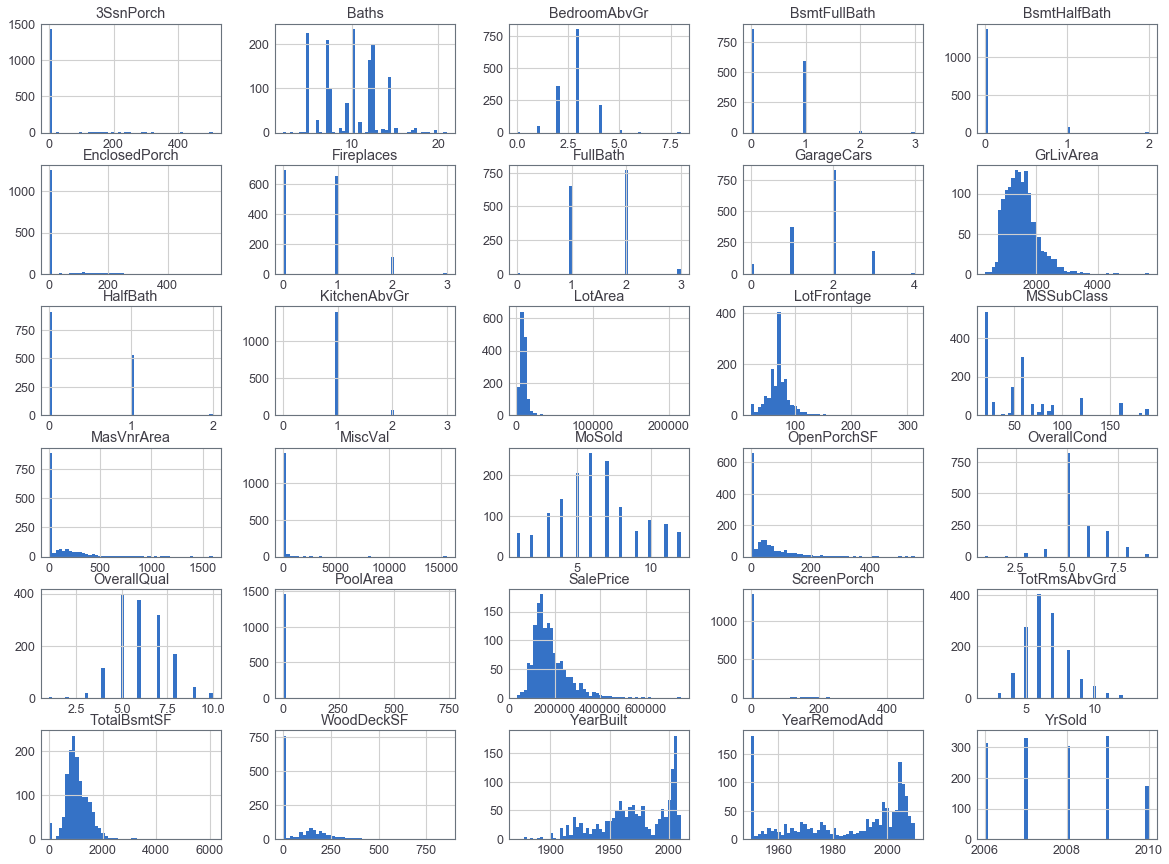

In [59]:
train.hist(bins=50, figsize=(20,15))

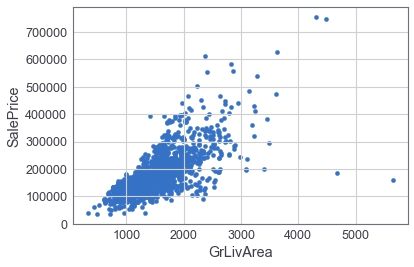

In [214]:
train.plot(kind='scatter', x='GrLivArea', y='SalePrice',c='b')
plt.show()

In [62]:
# remove outliers: GrLivArea above 4000 Square Feet
# train = train[train['GrLivArea'] < 4000]

**Descriptive Statistics**

- Check the descriptive statistics of the numerical columns
- Output the count distribution of each categorical feature

In [695]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Feature Engineering

**Univariate analysis**:
- summarize a continuous variable : use `describe()` function
- summarize a categorical variable we will use `value_counts()` function

**Bivariate analysis and Visualization**:

- Distribution of input/output variables
- Distribution of output in each class of categorical varialbes
- Correlations between continuous variables


**Process**
1. keep: "GrLivArea", remove: "1stFlrSF" , "2ndFlrSF" , "LowQualFinSF"   
   notes: a. "GrLivArea" is the total of the three b. GrLivArea shows strong linear relationship with SalePrice.
2. create a new column:  "Baths" = "FullBath"*4 + "HalfBath"*2 + "BsmtFullBath"*1 + "BsmtHalfBath"*0.5 
3. keep: "TotalBsmtSF", remove:  "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"   




4. keep: "BsmtFinType1", remove: "BsmtFinType2"
5. keep: "Condition1", remove "Condition2" 
6. keep: "YearBuilt" & "YearRemod" (Check with Lasso then drop it before Elastic Net or Not
7. remove:  "Heating"

8. remove: Utilities == 'NoSewer' obeservation ( index = 945 ) 
   remove: "Unilities" column
9. keep: "GarageCars", remove "GarageArea" 
10. keep: "GarageQual",  Remove "GarageCond"
11. remove: "GarageYrBlt", only 371 out of 1460 garages were built after the house was built. 
    the difference does not affect much of house price.

12. create a new column: "Porch.Agg" = 1*"EnclosedPorch" + 1*"3SsnPorch" + 0.8*"ScreenPorch" + 0.6*"OpenPorchSF" + 0.5*"WoodDeckSF"
    (Rescale the multipliers later and check the relationship between Porch.Agg and SalePrice)
13. remove:  "PoolQC" due to almost every obs is None
14. remove:  "MiscFeature" but keep the "MiscVal"
15. Should Check MoSold and YearSold to determine whether to integrate or not

### Classification of Variable Types

### DataCleaning

In [1438]:
import numpy as np 

testtrain = pd.concat([train,test])
testtrain = testtrain.reset_index()

testtrain.head(5)
testtrain.shape

(2919, 81)

In [1439]:

def manualImputeNdrop(x):
    df = x.copy(deep=True)
    df = df.drop(columns = ['Alley','Id', 'Utilities','LowQualFinSF',
                        '1stFlrSF','2ndFlrSF', 'PoolQC', 'MiscFeature', 
                        'GarageArea','GarageCond', 'GarageYrBlt',
                        'BsmtFinType2', 'Condition2', 'Heating',
                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
 
    df['MSSubClass'] = df['MSSubClass'].replace('150', '120')


    
    df['MasVnrType'] = df['MasVnrType'].replace('None', 'No')
    df['MasVnrType'] = df['MasVnrType'].fillna('No')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(float(0))
    df['BsmtQual'] = df['BsmtQual'].fillna('No')
    df['BsmtCond'] = df['BsmtCond'].fillna('No')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
    df['Electrical'] = df['Electrical'].fillna('SBrkr')

    df['GarageType'] = df['GarageType'].fillna('No')
    df['GarageFinish'] = df['GarageFinish'].fillna('No')
    df['GarageQual'] = df['GarageQual'].fillna('No')
    df['GarageQual'] = df['GarageQual'].replace('Ex', 'Gd')
    df['GarageCars'] = df['GarageCars'].fillna('No')      # 1 missing go with 'No'

    df['SaleType'] = df['SaleType'].fillna('Oth')


    df['FireplaceQu'] = df['FireplaceQu'].fillna('No')
    df['Fence'] = df['Fence'].fillna('No')
    df['HouseStyle'] = df['HouseStyle'].replace('2.5Fin', '2Story')

    df['Exterior1st'] = df['Exterior1st'].replace('ImStucc', 'Vinysd')
    df['Exterior1st'] = df['Exterior1st'].replace('Stone', 'VinylSd')
    df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd') # 1 missing go with VinylSd

    df['Exterior2nd'] = df['Exterior2nd'].replace('Other', 'VinylSd')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')  # 1 missing go with VinylSd

    df['MiscVal']=df['MiscVal'].fillna(int(0))

    df['KitchenQual'] = df['KitchenQual'].fillna('TA')      # 1 missing go with 'TA'

    df['MSSubClass'] = df['MSSubClass'].replace('150', '120')

    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())  
    df['SaleType'] = df['SaleType'].fillna('Oth')
    df['Functional'] = df['Functional'].fillna('Typ')  # 3 missing go with 'typical functionality
    df['MSZoning'] = df['MSZoning'].fillna('RL')        # 3 missing go with RL
    
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0.0)    # 2 missing go with 0.0
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0.0)      # 2 missing go with 0.0
    df['FullBath'] = df['FullBath'].fillna(0.0)
    df['HalfBath'] = df['HalfBath'].fillna(0.0) 
    df['Baths'] = 5*df['FullBath'] + 2.5*df['HalfBath'] + 3*df['BsmtFullBath'] + 1.5*df['BsmtHalfBath']


    return df

testtrain = manualImputeNdrop(testtrain)  #

In [1440]:
nominal_catV = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st' ,'Exterior2nd', 
                 'MasVnrType', 'Foundation', 'BsmtExposure', 'Electrical', 'GarageType', 'SaleType', 
                 'BsmtFinType1', 'Condition1'] #22

# Ordinal to Nominal due to complexity in rating : Condition1, BsmtFinType1

ordinal_catV = [ 'OverallQual', 'OverallCond', 'ExterQual','ExterCond', 'BsmtQual', 'BsmtCond',
                 'HeatingQC','CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 
                'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence', 'SaleCondition','Baths',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'OpenPorchSF', 'WoodDeckSF'] #22

discrete_V = ['YearBuilt', 'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageCars', 
              'MoSold', 'YrSold', "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"] # 13

numeric_V = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF', 'GrLivArea','PoolArea', 'MiscVal'] # 7 Variables


print(testtrain[nominal_catV].shape)
print(testtrain[ordinal_catV].shape)
print(testtrain[discrete_V].shape)
print(testtrain[numeric_V].shape)

(2919, 22)
(2919, 22)
(2919, 13)
(2919, 7)


In [1441]:
# pip install category_encoders
# pip install feature-engine 

from feature_engine.categorical_encoders import OneHotCategoricalEncoder, OrdinalCategoricalEncoder  

import category_encoders as ce

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import make_column_transformer

testtrain_dis_nom_ord = testtrain[nominal_catV+discrete_V+ordinal_catV].astype(object)   # Had to Change some variables from int64 to Object to make this function work 
# testtrain_ord = testtrain[ordinal_catV].astype(object)

OneHotEnc = OneHotCategoricalEncoder(
                        top_categories = None,
                        variables= nominal_catV+discrete_V+ordinal_catV,
                        drop_last = True
                                    )  

# Intuition needed in  " train.groupby('GarageQual')['SalePrice'].median().sort_values() "
# ordinal_columns_mapping = [
   
#    { "col": "ExterQual",        #1
#      "mapping" : {'Fa':1, 'TA':2, 'Gd':3, 'Ex':4
#                  }},
#    { "col": "ExterCond",        #2
#      "mapping" : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4
#                  }},
#    { "col": "BsmtQual",         #3
#      "mapping" : {'Fa':1, 'TA':2, 'Gd':3, 'Ex':4
#                  }},
#    { "col": "BsmtCond",         #4
#      "mapping" : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3
#                  }},
#    { "col": "HeatingQC",        #5
#      "mapping" : {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4
#                  }},
#    { "col": "CentralAir",       #6
#      "mapping" : {'N':0, 'Y':1
#                  }},   
#    { "col": "KitchenQual",      #7
#      "mapping" : {'Fa':1, 'TA':2, 'Gd':3, 'Ex':4
#                  }},
#    { "col": "Functional",       #8
#      "mapping" : {'Sev':0, 'Maj2':1, 'Maj1':2, 'Mod':3, 'Min1':4, 'Min2':5, 'Typ':6
#                  }},
#    { "col": "FireplaceQu",      #9
#      "mapping" : {'No':0 , 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5
#                  }},
#    { "col": "GarageFinish",     #10
#      "mapping" : {'No':0, 'Unf':1, 'RFn':2, 'Fin':3
#                  }},
#    { "col": "GarageQual",       #11
#      "mapping" : {'Po':0, 'No':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5
#                  }},       # Calibrated by " train.groupby('GarageQual')['SalePrice'].median().sort_values() "   # Intuition Needed ****
#    { "col": "PavedDrive",       #12
#      "mapping" : {'N':0, 'P':1, 'Y':2
#                  }},
#    { "col": "Fence",            #13
#      "mapping" : {'No':0, 'MnWw':1, 'MnPrv':2, 'GdWo':3, 'GdPrv':4
#                  }},    # Calibrated by " train.groupby('Fence')['SalePrice'].median().sort_values() "
#    { "col": "SaleCondition",    #14
#      "mapping" : {'AdjLand':0, 'Abnorml':1, 'Family':2, 'Normal':3, 'Partial':4
#                  }}
    
# ]    # Did not Include "OverallQual", "OverallCond" "Baths", it will be automatically done ***

# OrdEnc = ce.OrdinalEncoder(mapping = ordinal_columns_mapping, return_df= True)

features = testtrain[numeric_V]
preprocess = make_column_transformer(  (numeric_V, PowerTransformer(method='yeo-johnson', standardize = False) ) )
temp = preprocess.fit_transform(features)

# numeric_V = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF', 'GrLivArea','PoolArea', 'MiscVal'] # 7 Variables


lst = [temp[:, i] for i in range(7)]
for i in range(7):
    numerics = pd.DataFrame(lst, index=numeric_V).transpose()
    
    
nominal_discrete_ord = OneHotEnc.fit_transform(testtrain_dis_nom_ord[nominal_catV+discrete_V+ordinal_catV]) # All dtypes = Object, if needed can convert some back to int64.
# ordinals = OrdEnc.fit_transform(testtrain_ord)
nominal_discrete_ord = nominal_discrete.reset_index()
numerics = numerics.reset_index()
# ordinals = ordinals.reset_index()


testtrain_cleaned = pd.concat([nominal_discrete_ord, numerics], axis = 1) # ordinals
testtrain_cleaned = testtrain_cleaned.drop(columns='index')

testtrain_cleaned = testtrain_cleaned.drop(testtrain_cleaned.index[[523,1298]])
testtrain_cleaned = testtrain_cleaned.reset_index()
testtrain_cleaned = testtrain_cleaned.drop(columns = 'index')

In [1451]:
train_cleaned = testtrain_cleaned.iloc[0:1458]
test_cleaned = testtrain_cleaned.iloc[1458:2918]

X = train_cleaned
X_test = test_cleaned 

y = train['SalePrice']   
y = y.drop(y.index[[523,1298]])
y = y.reset_index()
y = y.drop(columns = 'Id')

In [1445]:
# train_cleaned[train_cleaned['Baths'].isnull()].index.tolist()

## Modelling (training set) 

## 1. Lasso (training)

In [1342]:
from sklearn.linear_model import Lasso

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

lasso = Lasso(normalize=True)
lasso_gs_cv = GridSearchCV(lasso, param_grid=param_grid, n_jobs = 2, cv = 5) 

lasso_gs_cv.fit(X, y) # lasso_gs_cv.fit(train_dropped_EN, y)   
pred_lasso = lasso_gs_cv.predict(X) 

print(np.sqrt(mean_squared_log_error(y, pred_lasso)))

0.12386697483762463


In [1324]:
lasso_gs_cv.best_params_

{'alpha': 7}

## 2. Ridge (training)

In [1337]:
ridge_gs_cv.best_params_

{'alpha': 4.0}

In [1347]:
from sklearn.linear_model import Ridge

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

ridge = Ridge(normalize=False)
ridge_gs_cv = GridSearchCV(ridge, param_grid=param_grid, n_jobs = 2, cv = 5) 

ridge_gs_cv.fit(X, y)   
pred_ridge = ridge_gs_cv.predict(X)    

print(np.sqrt(mean_squared_log_error(y, pred_ridge)))

0.12973925175986586


## 3. Random Forest (training)

In [1226]:
rf_cv.best_params_ 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [1348]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_grid = np.array([100, 200, 300, 500, 700, 1000]) # [100, 300, 500, 800, 1000] 
max_depth_grid = np.array([5, 15, 25, 40]) # [5, 15, 25, 35]
max_leaf_nodes_grid = np.array([10, 20, 30, 40, 50, 60]) # [10, 20, 30, 40, 50, 60]
max_features_grid = np.array(["sqrt"]) # ["sqrt", "log2"]
min_samples_split = np.array([5, 10, 15, 20])
verbose = [1]
random_state = [0]


param_grid = {"n_estimators":n_estimators_grid, 
              "max_depth" : max_depth_grid,
              "max_leaf_nodes" : max_leaf_nodes_grid,
              "max_features" : max_features_grid,
              "min_samples_split": min_samples_split,
              "verbose" : verbose,
              "random_state" : random_state}

rf = RandomForestRegressor(random_state = 0)

rf_cv = GridSearchCV(rf, param_grid = param_grid, n_jobs = 2, cv = 5)

rf_cv.fit(X, y)
pred_rf = rf_cv.predict(X)

print(np.sqrt(mean_squared_log_error(y, pred_rf)))

KeyboardInterrupt: 

## 4. Gradient Boosting (training)

In [127]:
gb_cv.best_params_

{'learning_rate': 0.3,
 'loss': 'huber',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [1133]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators_grid = np.array([100, 200, 300, 400, 500, 600, 700, 800, 1000]) # , 500, 800, 1000
learning_rate_grid = np.array([0.3, 0.5, 0.7, 1]) #  0.5,  0.7, 1
max_depth_grid = np.array([5, 10, 20])  # 10 , 20
max_features_grid = np.array(["sqrt"])
loss_grid = np.array(['huber'])

# "min_simples_leaf" : min_samples_leaf_grid,

param_grid = {"n_estimators":n_estimators_grid, 
              "learning_rate" : learning_rate_grid,
              "max_depth" : max_depth_grid,
              "max_features" : max_features_grid,
              "loss" :  loss_grid 
             }

gbr = GradientBoostingRegressor( random_state = 0 )

gb_cv = GridSearchCV(gbr, param_grid = param_grid, n_jobs = 2, cv = 5)
gb_cv.fit(train_dropped_EN, yr)

pred_gbr = gb_cv.predict(train_dropped_EN)
print(np.sqrt(mean_squared_log_error(y, pred_gbr)))

0.15961988318494452


# Stacking (training)

### Stacking (mlxtend)

In [1154]:
from mlxtend.regressor import StackingRegressor

# Initializing models

regressors = [lasso_gs_cv, ridge_gs_cv, rf_cv, gb_cv]
reg_meta = Lasso(random_state = 0)

reg_stack = StackingRegressor(regressors=regressors, 
                               meta_regressor = reg_meta)


reg_stack.fit(X_subtr,y_subtr)

pred_stack_cv = reg_stack.predict(X_val)

print(np.sqrt(mean_squared_log_error(y_val, pred_stack_cv)))

0.16094646553411665


# For Kaggle Submission : Train on the whole Training set

In [ ]:
X = train_cleaned
X_test = test_cleaned 

y = train['SalePrice']   
y = y.drop(y.index[[523,1298]])
y = y.reset_index()
y = y.drop(columns = 'Id')

### Lasso

In [1454]:
from sklearn.linear_model import Lasso

alpha_space = np.array([7])
param_grid = {'alpha': alpha_space}

lasso = Lasso(normalize=False)
lasso_gs_cv_kag = GridSearchCV(lasso, param_grid=param_grid, n_jobs = 2, cv = 10) 

lasso_gs_cv_kag.fit(X, y) 

pred_lasso_kag = lasso_gs_cv_kag.predict(X_test) 

In [ ]:
data_lasso = { 'Id': range(1461, 2920), 'SalePrice' : pred_lasso_kag } 
y_submission_lasso = pd.DataFrame(data_lasso, index = range(1, 1460))

y_submission_lasso.to_csv(r'C:/Users/jgwak/OneDrive/Desktop/machinelearning_project/lasso.csv')

### Ridge

In [1455]:
from sklearn.linear_model import Ridge

alpha_space = np.array([4])
param_grid = {'alpha': alpha_space}

ridge = Ridge(normalize=False)
ridge_gs_cv_kag = GridSearchCV(ridge, param_grid=param_grid, n_jobs = 2, cv = 10) 

ridge_gs_cv_kag.fit(X, y)   
pred_ridge_kag = ridge_gs_cv_kag.predict(X_test)    

In [ ]:
data_ridge = { 'Id': range(1461, 2920), 'SalePrice' : pred_ridge_kag } 
y_submission_ridge = pd.DataFrame(data_ridge, index = range(1, 1460))

y_submission_ridge.to_csv(r'C:/Users/jgwak/OneDrive/Desktop/machinelearning_project/ridge.csv')

### Random Forest

In [1475]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_grid = np.array([100, 300, 500]) # [100, 300, 500, 800, 1000] 
max_depth_grid = np.array([5, 15, 35]) # [5, 15, 25, 35]
max_leaf_nodes_grid = np.array([10, 20, 30]) # [10, 20, 30, 40, 50, 60]
max_features_grid = np.array(["sqrt"]) # ["sqrt", "log2"]
min_samples_split = np.array([10, 30])

param_grid = {"n_estimators":n_estimators_grid, 
              "max_depth" : max_depth_grid,
              "max_leaf_nodes" : max_leaf_nodes_grid,
              "max_features" : max_features_grid,
              "min_samples_split" : min_samples_split}

rf = RandomForestRegressor(random_state = 0)

rf_cv_kag = GridSearchCV(rf, param_grid = param_grid, n_jobs = 2, cv = 5)

rf_cv_kag.fit(X, y)
pred_rf_kag = rf_cv_kag.predict(X_test)

KeyboardInterrupt: 

In [1473]:
data_rf = { 'Id': range(1461, 2920), 'SalePrice' : pred_rf_kag } 
y_submission_rf = pd.DataFrame(data_rf, index = range(1, 1460))

y_submission_rf.to_csv(r'C:/Users/jgwak/OneDrive/Desktop/machinelearning_project/randomforest.csv')

### Gradient Boosting

In [1478]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators_grid = np.array([100, 300, 500, 1000]) # , 500, 800, 1000
learning_rate_grid = np.array([0.1, 0.3, 0.5, 0.7]) #  0.5,  0.7, 1
max_depth_grid = np.array([3, 5, 10, 20])  # 10 , 20
max_features_grid = np.array(["sqrt"])
loss_grid = np.array(['huber'])
alphas = np.array([0.01, 0.1, 0.3, 0.5 ])
min_splits = np.array([3, 10, 15])
# "min_simples_leaf" : min_samples_leaf_grid,

param_grid = {"n_estimators":n_estimators_grid, 
              "learning_rate" : learning_rate_grid,
              "max_depth" : max_depth_grid,
              "max_features" : max_features_grid,
              "loss" :  loss_grid, 
              "min_samples_split" : min_splits
             }

gbr = GradientBoostingRegressor( random_state = 0 )

gb_cv_kag = GridSearchCV(gbr, param_grid = param_grid, n_jobs = 2, cv = 5)
gb_cv_kag.fit(X, y)

pred_gbr_kag = gb_cv_kag.predict(X_test)



In [1479]:
data_graboost = { 'Id': range(1461, 2920), 'SalePrice' : pred_gbr_kag } 
y_submission_graboost = pd.DataFrame(data_graboost, index = range(1, 1460))

y_submission_graboost.to_csv(r'C:/Users/jgwak/OneDrive/Desktop/machinelearning_project/gradientboosting2.csv')

## Stacking for Kaggle Submission


In [1476]:
from mlxtend.regressor import StackingRegressor

# Initializing models

regressors = [lasso_gs_cv_kag, ridge_gs_cv_kag, rf_cv_kag, gb_cv_kag]
reg_meta = Lasso(random_state = 0)

reg_stack_kag = StackingRegressor(regressors=regressors, 
                           meta_regressor = reg_meta)

# o = pd.concat([rf_pred, boost_pred, lasso_pred, ridge_pred])


reg_stack_kag.fit(X,y)

pred_stack_cv_kag = reg_stack_kag.predict(X_test)

In [1477]:

data_stack = { 'Id': range(1461, 2920), 'SalePrice' : pred_stack_cv_kag } 
y_submission_stack = pd.DataFrame(data2, index = range(1, 1460))

y_submission_stack.to_csv(r'C:/Users/jgwak/OneDrive/Desktop/machinelearning_project/stacking.csv')